<a href="https://colab.research.google.com/github/lenaphamthi/PTDL-HK1_2023-2024/blob/main/%C4%90%E1%BB%93%20%C3%A1n%20PTDL-M%C3%B4_h%C3%ACnh_RNN_v%C3%A0_c%C3%A1c_thu%E1%BA%ADt_to%C3%A1n_t%E1%BB%91i_%C6%B0u.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
from wordcloud import WordCloud
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

# Preprocessing and evaluation
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l1, l2

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('all')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_gr

True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#https://drive.google.com/file/d/1M_ihUXaTU5cGCE9HEVSB_ay4DQ-bKfrd/view?usp=drive_link
#https://drive.google.com/file/d/1uDUiSC2LvWJpPuXzWKP6M8z3vvthtsKO/view?usp=sharing
!gdown 1uDUiSC2LvWJpPuXzWKP6M8z3vvthtsKO
!gdown 1M_ihUXaTU5cGCE9HEVSB_ay4DQ-bKfrd


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Downloading...
From: https://drive.google.com/uc?id=1uDUiSC2LvWJpPuXzWKP6M8z3vvthtsKO
To: /content/cleaned_df .csv
100% 17.3M/17.3M [00:00<00:00, 168MB/s]
Downloading...
From: https://drive.google.com/uc?id=1M_ihUXaTU5cGCE9HEVSB_ay4DQ-bKfrd
To: /content/cleaned_df.csv
100% 17.3M/17.3M [00:00<00:00, 171MB/s]


In [ ]:
df = pd.read_csv('cleaned_df .csv')
df.head()

,Reviewer's content,Reviewer's rate,label,Length,clean
0,Hindu Temple complex built by the Cham. Very r...,5,Positive,151,hindu temple complex build cham reminiscent ea...
1,Po Nagar Cham Tower is a Cham temple tower fou...,5,Positive,455,po nagar cham tower cham temple tower found so...
2,It’s a historical place where my children were...,5,Positive,118,it’s historical place children love visit arch...
3,"The temple is very well-preserved, especially ...",5,Positive,193,temple wellpreserved especially consider close...
4,Only needs half an hour. Lovely grounds. Less ...,5,Positive,99,need half hour lovely ground less one usd ente...


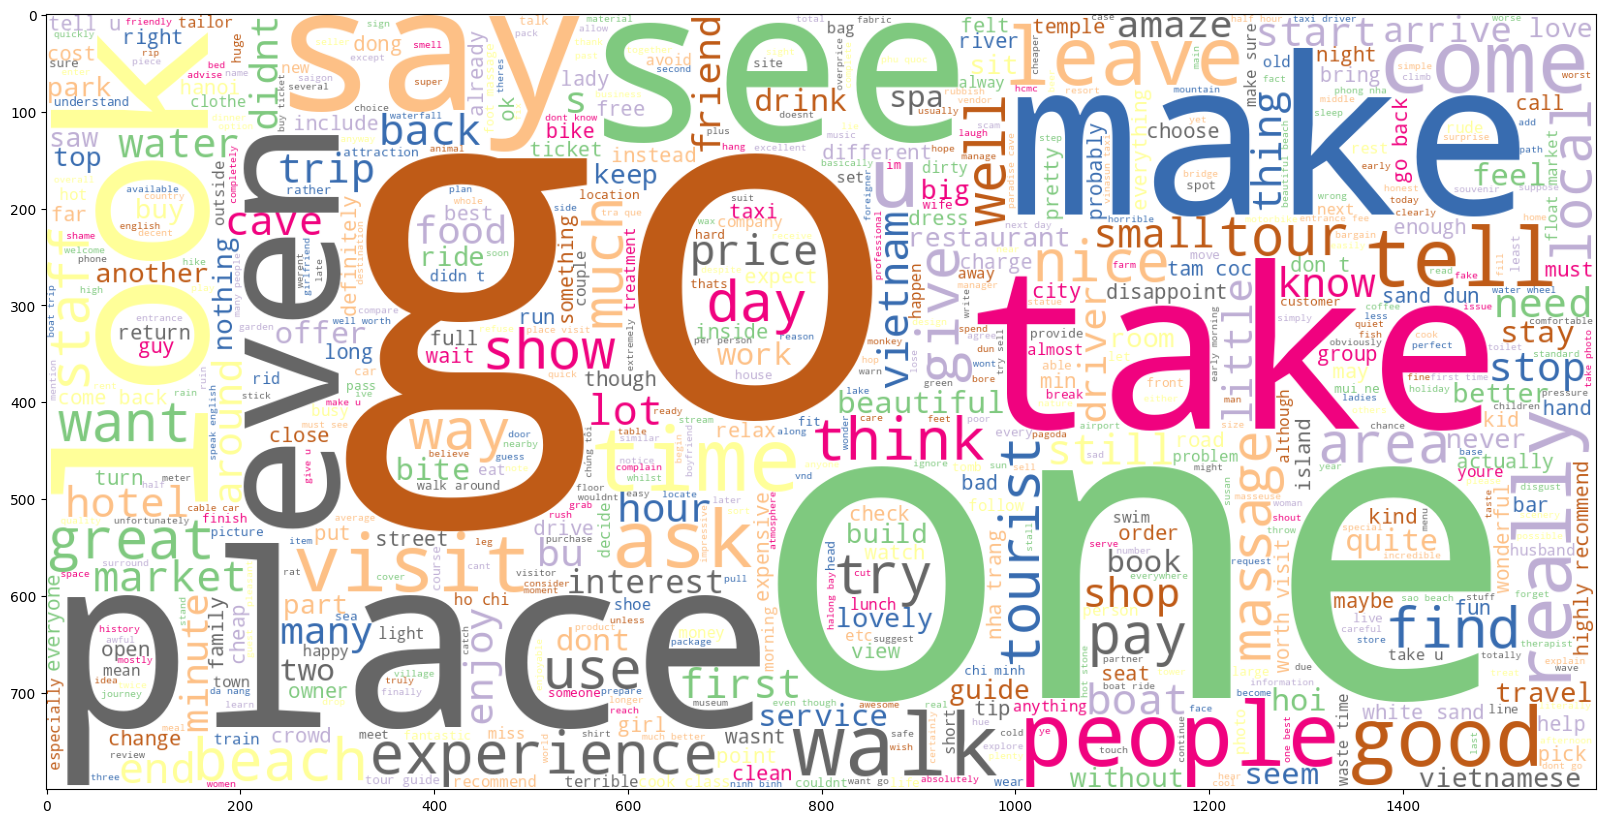

In [ ]:

# After cleaning, let's see the most common used word
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=1000, min_font_size=10,
                height=800,width=1600,background_color="white", colormap='Accent').generate(' '.join(df['clean']))

plt.imshow(wc)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df["clean"], df['label'], test_size=0.2)
vocab_size = 1000
embedding_dim = 300
max_length = 200
trunc_type='post'
padding_type='post'
oov_tok = "<UNK>"

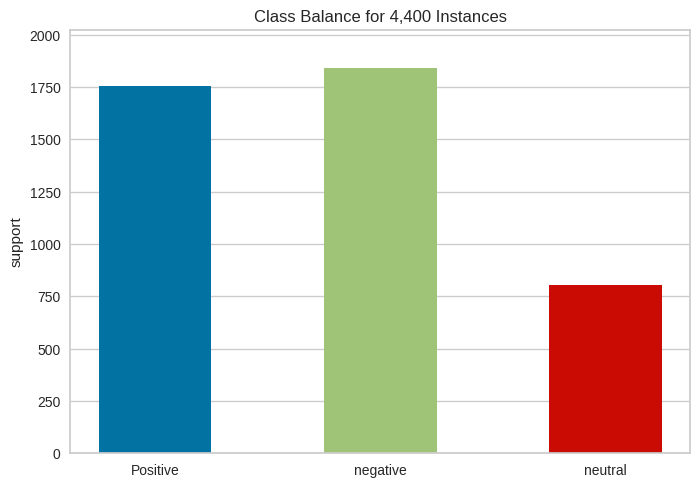

<Axes: title={'center': 'Class Balance for 4,400 Instances'}, ylabel='support'>

In [ ]:
from yellowbrick.target import ClassBalance

visualizer = ClassBalance(labels=["Positive", "negative", 'neutral'])
visualizer.fit(y_train=y_test)
visualizer.poof()

In [ ]:
tfid = TfidfVectorizer() #vecto hóa từ
train_tfid_matrix = tfid.fit_transform(X_train) #trích xuất đặc trưng
test_tfid_matrix = tfid.transform(X_test)

In [ ]:
log = LogisticRegression(max_iter=1000,multi_class='multinomial', solver='lbfgs')
log.fit(train_tfid_matrix, y_train)

pred = log.predict(test_tfid_matrix)

In [ ]:
accuracy = accuracy_score(y_test, pred)
print("Accuracy : %.2f%%" % (accuracy*100.0))

Accuracy : 83.66%


In [ ]:
# Libraries to create and train our model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback
from keras.callbacks import ModelCheckpoint
import time
import tensorflow as tf
from sklearn.metrics import accuracy_score

In [ ]:
# Hàm callback để dừng huấn luyện khi đạt được độ chính xác mong muốn
class AccuracyCallback(Callback):
    def __init__(self, target_accuracy):
        super(AccuracyCallback, self).__init__()
        self.target_accuracy = target_accuracy
        self.start_time = None

    def on_epoch_begin(self, epoch, logs=None):
        if self.start_time is None:
            self.start_time = time.time()

    def on_epoch_end(self, epoch, logs=None):
        current_accuracy = logs.get('val_accuracy') or logs.get('val_acc')
        if current_accuracy >= self.target_accuracy:
            end_time = time.time()
            total_time = end_time - self.start_time
            print(f"Target accuracy reached! Total training time: {total_time:.2f} seconds")

# Khởi tạo callback với độ chính xác mục tiêu là 0.84 (84%)
accuracy_callback = AccuracyCallback(target_accuracy=0.84)

In [ ]:
train_tfid_matrix.shape

(17600, 37216)

In [ ]:
# Sử dụng TfidfVectorizer để chuyển đổi văn bản thành ma trận TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)



def sparse(X_train_tfidf):
  # Assume your SparseTensor is named sparse_tensor
  # Reorder the SparseTensor
  # Convert CSR matrix to COO format
  coo_matrix = X_train_tfidf.tocoo()

  sparse_tensor = tf.sparse.SparseTensor(
      indices=tf.cast(tf.stack([coo_matrix.row, coo_matrix.col], axis=1), tf.int64),
      values=tf.constant(coo_matrix.data, dtype=tf.float32),
      dense_shape=tf.cast(coo_matrix.shape, tf.int64)
  )

  # Reorder SparseTensor
  sparse_tensor_reordered = tf.sparse.reorder(sparse_tensor)
  return sparse_tensor_reordered

sparse_tensor_reordered = sparse(X_train_tfidf)
sparse_tensor_reordered_test = sparse(X_test_tfidf)


# One-hot encode nhãn
lb = LabelBinarizer()
y_train_onehot = lb.fit_transform(y_train)
y_test_onehot = lb.transform(y_test)

# Số chiều đặc trưng và số lớp
num_features = sparse_tensor_reordered.shape[1]
num_classes = y_train_onehot.shape[1]



In [ ]:
from keras.optimizers import Adam

#khai báo adamW
# Sử dụng optimizer AdamW từ TensorFlow
optimizer = tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=0.01)


# Xây dựng mô hình softmax với TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=num_classes, activation='softmax', input_dim=num_features)
])

# Compile mô hình với optimizer là Adamw
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Hiển thị cấu trúc của mô hình
model.summary()

checkpoint = ModelCheckpoint('/content/softmax_adamw-{epoch:03d}.h5',
                                 monitor='val_loss',
                                 verbose=0,
                                 save_best_only = True,
                                 mode='auto')



start_time = time.time()
# Huấn luyện mô hình
model.fit(sparse_tensor_reordered, y_train_onehot, epochs=50, batch_size=32, validation_data=(sparse_tensor_reordered_test, y_test_onehot), callbacks=[checkpoint, accuracy_callback])

# Kết thúc tính thời gian
end_time = time.time()
# Tính tổng thời gian chạy huấn luyện
total_time = end_time - start_time
print(f"Total training time: {total_time} seconds")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 111276    
                                                                 
Total params: 111276 (434.67 KB)
Trainable params: 111276 (434.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
550/550 [==============================] - 4s 5ms/step - loss: 0.9421 - accuracy: 0.7431 - val_loss: 0.8270 - val_accuracy: 0.7695
Epoch 2/50
550/550 [==============================] - 4s 7ms/step - loss: 0.7582 - accuracy: 0.7711 - val_loss: 0.7072 - val_accuracy: 0.7782
Epoch 3/50
550/550 [==============================] - 3s 5ms/step - loss: 0.6515 - accuracy: 0.7918 - val_loss: 0.6327 - val_accuracy: 0.7943
Epoch 4/50
550/550 [==============================] - 3s 5ms/step - loss: 0.5789 - accuracy: 0.8196 - val_loss: 0.58

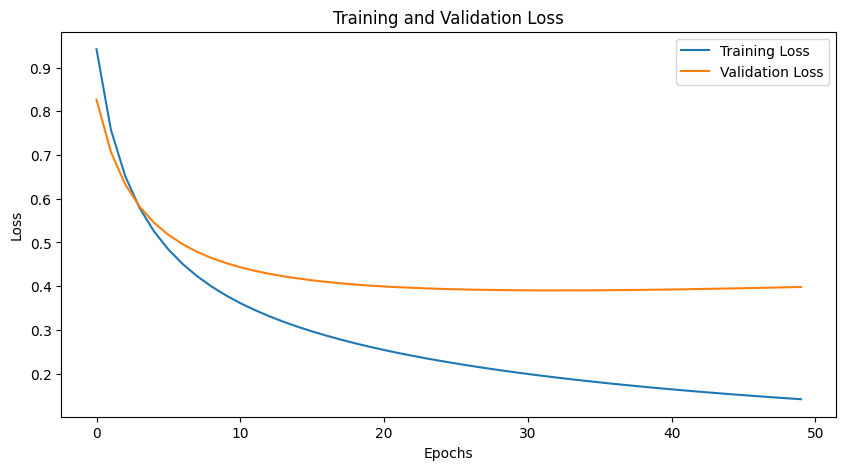

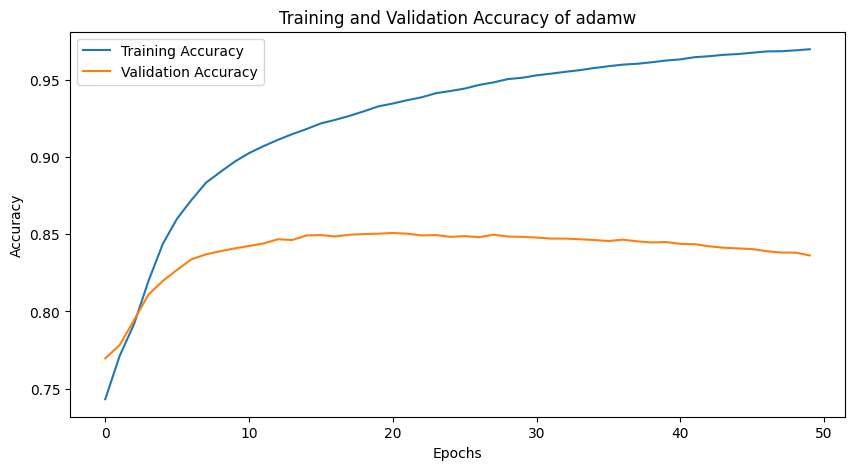

In [ ]:
import matplotlib.pyplot as plt



# Lấy giá trị mất mát và accuracy từ history
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
train_acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']

# Vẽ đồ thị mất mát
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Vẽ đồ thị độ chính xác
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy of adamw')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Xây dựng mô hình softmax với TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=num_classes, activation='softmax', input_dim=num_features)
])

# Compile mô hình với optimizer là sgd
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Hiển thị cấu trúc của mô hình
model.summary()

checkpoint = ModelCheckpoint('/content/softmax_sgd-{epoch:03d}.h5',
                                 monitor='val_loss',
                                 verbose=0,
                                 save_best_only = True,
                                 mode='auto')

start_time = time.time()
# Huấn luyện mô hình
model.fit(sparse_tensor_reordered, y_train_onehot, epochs=50, batch_size=32, validation_data=(sparse_tensor_reordered_test, y_test_onehot), callbacks=[checkpoint, accuracy_callback])

# Kết thúc tính thời gian
end_time = time.time()
# Tính tổng thời gian chạy huấn luyện
total_time = end_time - start_time
print(f"Total training time: {total_time} seconds")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 3)                 111276    
                                                                 
Total params: 111276 (434.67 KB)
Trainable params: 111276 (434.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
550/550 [==============================] - 5s 7ms/step - loss: 1.0565 - accuracy: 0.5659 - val_loss: 1.0325 - val_accuracy: 0.6875
Epoch 2/50
550/550 [==============================] - 3s 5ms/step - loss: 1.0325 - accuracy: 0.6851 - val_loss: 1.0208 - val_accuracy: 0.7232
Epoch 3/50
550/550 [==============================] - 4s 6ms/step - loss: 1.0243 - accuracy: 0.7165 - val_loss: 1.0133 - val_accuracy: 0.7380
Epoch 4/50
550/550 [==============================] - 3s 5ms/step - loss: 1.0170 - accuracy: 0.7250 - val_loss: 1.00

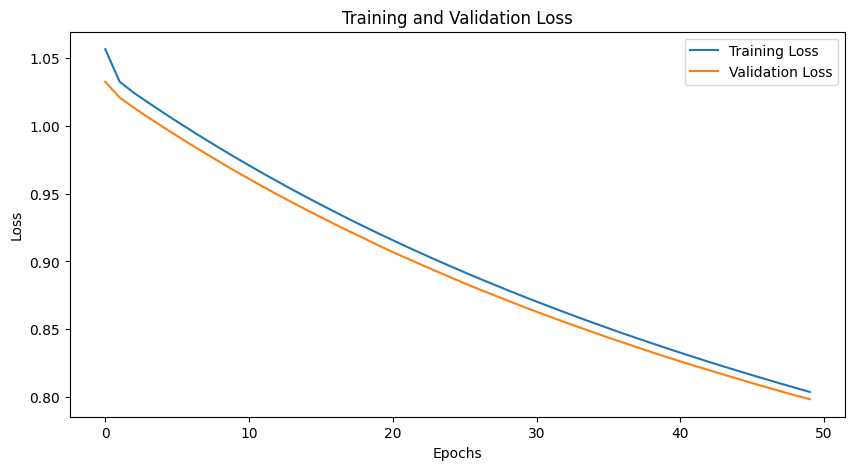

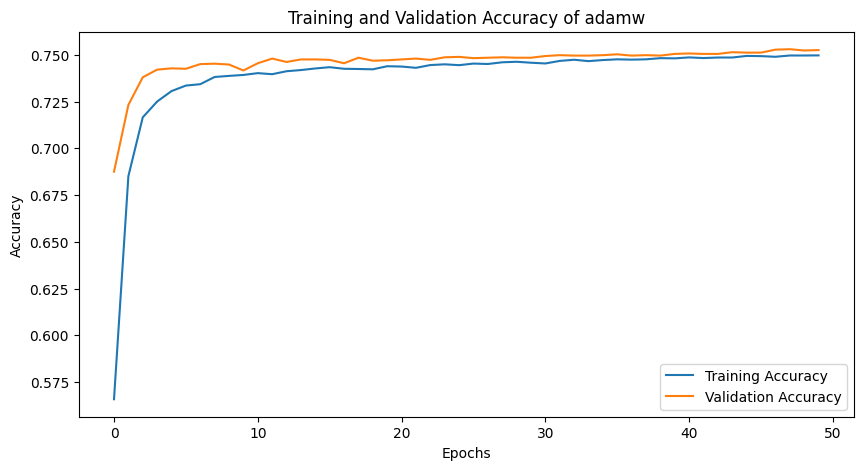

In [ ]:
import matplotlib.pyplot as plt



# Lấy giá trị mất mát và accuracy từ history
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
train_acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']

# Vẽ đồ thị mất mát
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Vẽ đồ thị độ chính xác
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy of adamw')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Xây dựng mô hình softmax với TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=num_classes, activation='softmax', input_dim=num_features)
])

# Compile mô hình với optimizer là Adam
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Hiển thị cấu trúc của mô hình
model.summary()

checkpoint = ModelCheckpoint('/content/softmax_adam-{epoch:03d}.h5',
                                 monitor='val_loss',
                                 verbose=0,
                                 save_best_only = True,
                                 mode='auto')

start_time = time.time()
# Huấn luyện mô hình
model.fit(sparse_tensor_reordered, y_train_onehot, epochs=50, batch_size=32, validation_data=(sparse_tensor_reordered_test, y_test_onehot), callbacks=[checkpoint, accuracy_callback])

# Kết thúc tính thời gian
end_time = time.time()
# Tính tổng thời gian chạy huấn luyện
total_time = end_time - start_time
print(f"Total training time: {total_time} seconds")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 111276    
                                                                 
Total params: 111276 (434.67 KB)
Trainable params: 111276 (434.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
550/550 [==============================] - 5s 8ms/step - loss: 0.9402 - accuracy: 0.7455 - val_loss: 0.8258 - val_accuracy: 0.7682


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/50
550/550 [==============================] - 3s 5ms/step - loss: 0.7572 - accuracy: 0.7719 - val_loss: 0.7059 - val_accuracy: 0.7786
Epoch 3/50
550/550 [==============================] - 3s 5ms/step - loss: 0.6500 - accuracy: 0.7923 - val_loss: 0.6310 - val_accuracy: 0.7927
Epoch 4/50
550/550 [==============================] - 4s 8ms/step - loss: 0.5767 - accuracy: 0.8205 - val_loss: 0.5797 - val_accuracy: 0.8089
Epoch 5/50
550/550 [==============================] - 4s 7ms/step - loss: 0.5225 - accuracy: 0.8452 - val_loss: 0.5426 - val_accuracy: 0.8191
Epoch 6/50
550/550 [==============================] - 6s 10ms/step - loss: 0.4805 - accuracy: 0.8609 - val_loss: 0.5144 - val_accuracy: 0.8275
Epoch 7/50
550/550 [==============================] - 7s 13ms/step - loss: 0.4466 - accuracy: 0.8740 - val_loss: 0.4926 - val_accuracy: 0.8345
Epoch 8/50
550/550 [==============================] - 3s 5ms/step - loss: 0.4184 - accuracy: 0.8851 - val_loss: 0.4751 - val_accuracy: 0.8368
Epoc

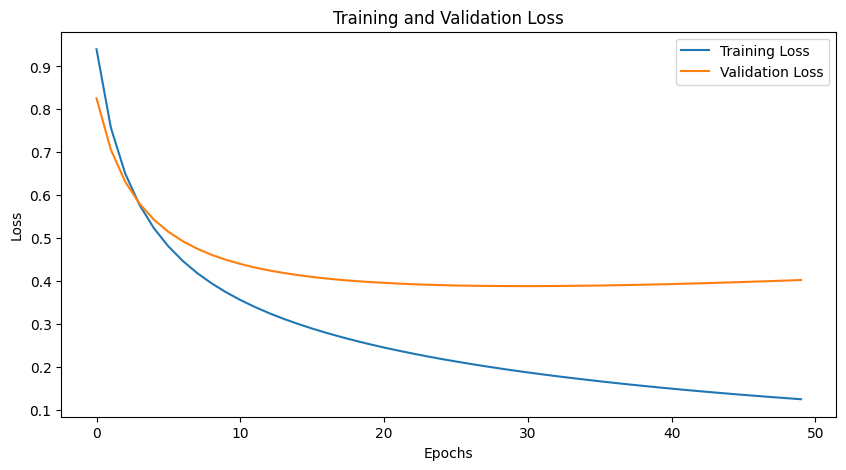

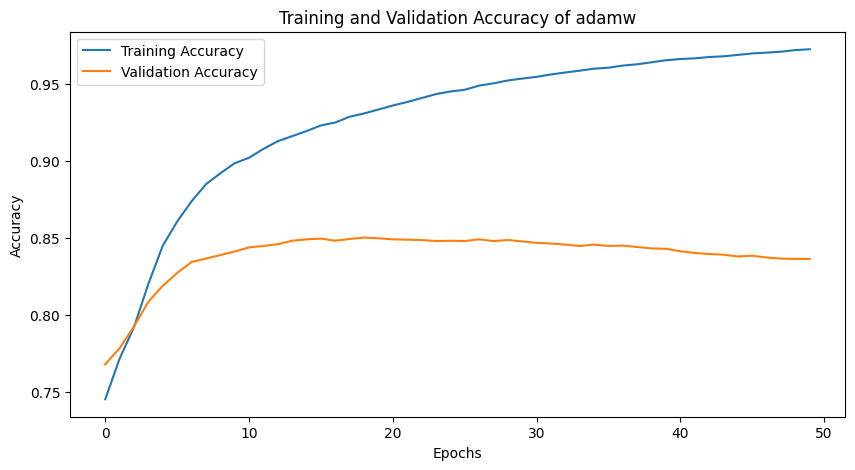

In [ ]:
import matplotlib.pyplot as plt



# Lấy giá trị mất mát và accuracy từ history
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
train_acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']

# Vẽ đồ thị mất mát
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Vẽ đồ thị độ chính xác
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy of adamw')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def load_model_(model_path):

  # Tải mô hình từ file
  loaded_model = load_model(model_path)

  # In thông tin về mô hình
  loaded_model.summary()
  return loaded_model

def process_data(data):
  # Sử dụng TfidfVectorizer để chuyển đổi văn bản thành ma trận TF-IDF
  tfidf_vectorizer = TfidfVectorizer()
  X_train_tfidf = tfidf_vectorizer.fit_transform(data)

  coo_matrix = X_train_tfidf.tocoo()

  sparse_tensor = tf.sparse.SparseTensor(
      indices=tf.cast(tf.stack([coo_matrix.row, coo_matrix.col], axis=1), tf.int64),
      values=tf.constant(coo_matrix.data, dtype=tf.float32),
      dense_shape=tf.cast(coo_matrix.shape, tf.int64)
  )

  # Reorder SparseTensor
  sparse_tensor_reordered = tf.sparse.reorder(sparse_tensor)

  return sparse_tensor_reordered


def truc_quan_kq(y_test, y_pred_knn):
  conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_knn)
  #sử dụng Matplotlib để vẽ confusion matrix
  fig, ax = plt.subplots(figsize=(5, 5))
  cax = ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)

  for i in range(conf_matrix.shape[0]):
      for j in range(conf_matrix.shape[1]):
          ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
  fig.colorbar(cax)
  plt.xlabel('Dự đoán', fontsize=18)
  plt.ylabel('Label', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()


def cleaning(text):
  #remove punctuations and uppercase
  clean_text = text.translate(str.maketrans('','',string.punctuation)).lower()

  #remove stopwords
  clean_text = [word for word in clean_text.split() if word not in stopwords.words('english')]

  #lemmatize the word (normalization)
  sentence = []
  for word in clean_text:
      lemmatizer = WordNetLemmatizer()
      sentence.append(lemmatizer.lemmatize(word, 'v'))

  return ' '.join(sentence)

In [ ]:
softmax_adam = load_model_('/content/softmax_adam-031.h5')
softmax_sgd = load_model_('/content/softmax_sgd-050.h5')
softmax_adamw = load_model_('/content/softmax_adamw-032.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 111276    
                                                                 
Total params: 111276 (434.67 KB)
Trainable params: 111276 (434.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 3)                 111276    
                                                                 
Total params: 111276 (434.67 KB)
Trainable params: 111276 (434.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_2"
________________________________________________________________

138/138 [==============================] - 0s 2ms/step


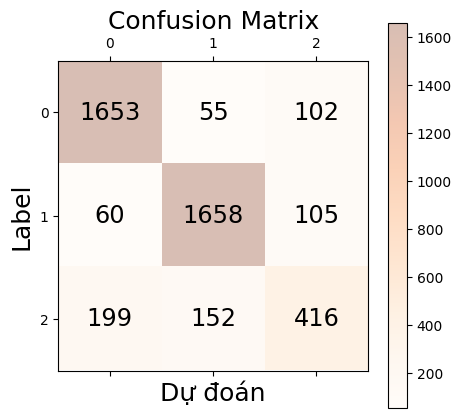

Accuracy : 84.70%


In [ ]:
pre_adam = softmax_adam.predict(sparse_tensor_reordered_test)
predictions = argmax(pre_adam, axis=1)
testY = argmax(y_test_onehot, axis=1)
truc_quan_kq(testY, predictions)
accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))

In [ ]:
print(classification_report(testY, predictions, target_names=['Positive', 'Negative', 'Neutral']))

              precision    recall  f1-score   support

    Positive       0.86      0.91      0.89      1810
    Negative       0.89      0.91      0.90      1823
     Neutral       0.67      0.54      0.60       767

    accuracy                           0.85      4400
   macro avg       0.81      0.79      0.80      4400
weighted avg       0.84      0.85      0.84      4400



138/138 [==============================] - 0s 3ms/step


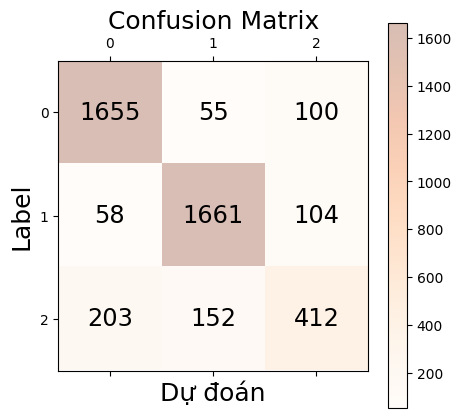

Accuracy : 84.73%


In [ ]:
pre_adamw = softmax_adamw.predict(sparse_tensor_reordered_test)
predictions = argmax(pre_adamw, axis=1)
testY = argmax(y_test_onehot, axis=1)
truc_quan_kq(testY, predictions)
accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))

In [ ]:
print(classification_report(testY, predictions, target_names=['Positive', 'Negative', 'Neutral']))

              precision    recall  f1-score   support

    Positive       0.86      0.91      0.89      1810
    Negative       0.89      0.91      0.90      1823
     Neutral       0.67      0.54      0.60       767

    accuracy                           0.85      4400
   macro avg       0.81      0.79      0.79      4400
weighted avg       0.84      0.85      0.84      4400



138/138 [==============================] - 0s 2ms/step


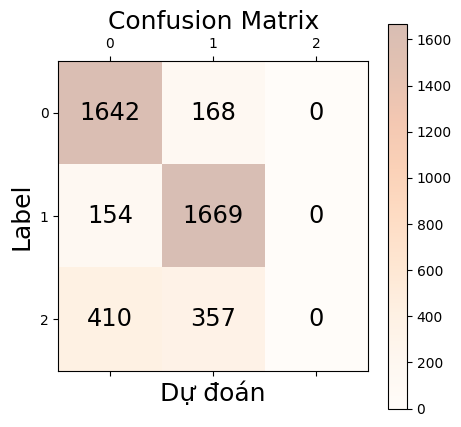

Accuracy : 75.25%


In [ ]:
pre_sgd = softmax_sgd.predict(sparse_tensor_reordered_test)
predictions = argmax(pre_sgd, axis=1)
testY = argmax(y_test_onehot, axis=1)
truc_quan_kq(testY, predictions)
accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))

In [ ]:
print(classification_report(testY, predictions, target_names=['Positive', 'Negative', 'Neutral']))

              precision    recall  f1-score   support

    Positive       0.74      0.91      0.82      1810
    Negative       0.76      0.92      0.83      1823
     Neutral       0.00      0.00      0.00       767

    accuracy                           0.75      4400
   macro avg       0.50      0.61      0.55      4400
weighted avg       0.62      0.75      0.68      4400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
label = ['Positive', 'Negative', 'Neutral']

In [ ]:
data = 'This tour is so attractive, a large, majestic palace, great for my family, I really like it' #@param {type:"string"}
data_clean = cleaning(data)
if isinstance(data_clean, str):
    data_clean = [data_clean]
data_processed = process_data(data_clean)
pre_adamw = softmax_adamw.predict(data_processed)
predictions = argmax(pre_adamw, axis=1)
print(label[predictions[0]])

1/1 [==============================] - 0s 14ms/step
Negative
